# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Sieu Eric Diep

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [122]:
# TODO: Import dataset and inspect the first five columns
df = pd.read_csv("seeds_dataset.txt", sep='\t', header = None)
print(df.head(5))
print(df.describe())
print('\nMissing value: ')
print(df.isnull().sum())

       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
                0           1           2           3           4           5  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean    14.847524   14.559286    0.870999    5.628533    3.258605    3.700201   
std      2.909699    1.305959    0.023629    0.443063    0.377714    1.503557   
min     10.590000   12.410000    0.808100    4.899000    2.630000    0.765100   
25%     12.270000   13.450000    0.856900    5.262250    2.944000    2.561500   
50%     14.355000   14.320000    0.873450    5.523500    3.237000    3.599000   
75%     17.305000   15.715000    0.887775    5.979750    3.561750    4.768750   
max     21.180000   17

Next, you will need to separate the data into your feature matrix and target vector.

In [123]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = df.drop([7], axis=1)
y = df[7]
print(X.head(5))
print(y.head(5))
print('Dimension of: ')
print('\t Feature Matrix: ', X.shape)
print('\t Target vector: ', y.shape)

       0      1       2      3      4      5      6
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175
0    1
1    1
2    1
3    1
4    1
Name: 7, dtype: int64
Dimension of: 
	 Feature Matrix:  (210, 7)
	 Target vector:  (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

Before we implement the scaler, we need to split the data into training and testing sets first.

In [124]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [125]:
# TODO: Print the shape of the training feature matrix and target vector
print("Shape of training feature matrix: ", X_train.shape)
print("Shape of training target vector:", y_train.shape)

Shape of training feature matrix:  (157, 7)
Shape of training target vector: (157,)


Now that we have our training data, we can implement our selected scaler.

In [126]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
#the testing set doesn't need to be fit into the scaler
X_test_scaled = scaler.transform(X_test)


### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [127]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#lr = model.fit(X_train, y_train)

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [128]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [129]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

grid_search = GridSearchCV(model, param_grid, cv = 5)

grid_search.fit(X_train_scaled, y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0],
                         'fit_intercept': [True, False]})

In [130]:
best_param = grid_search.best_params_
print('Best paramters: ', best_param)

#cross-validation score and test score
best_score = grid_search.best_score_
print('Best score: ', best_score)

#test score
test_score = grid_search.score(X_test_scaled, y_test)

print('Test score: ', test_score)


Best paramters:  {'C': 10.0, 'fit_intercept': True}
Best score:  0.9487903225806452
Test score:  0.9433962264150944


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [131]:
# TODO: Predict y labels using best estimator
best_clf = grid_search.best_estimator_
y_pred =  best_clf.predict(X_test_scaled)
print("Prediction of y labels using .predict(): ", y_pred)

Prediction of y labels using .predict():  [2 3 3 1 3 1 3 2 2 3 2 3 2 1 2 3 1 2 1 3 1 1 3 3 2 1 2 2 1 2 3 2 3 3 1 1 3
 1 1 3 1 1 1 1 1 3 3 2 2 1 1 3 1]


In [132]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA
# Instantiate the PCA model
pca = PCA(n_components = 2) # set the components to 2
# Fit the model to the scaled data
pca_result = pca.fit_transform(X_test_scaled)
print("Shape of pca: ", pca_result.shape)

Shape of pca:  (53, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


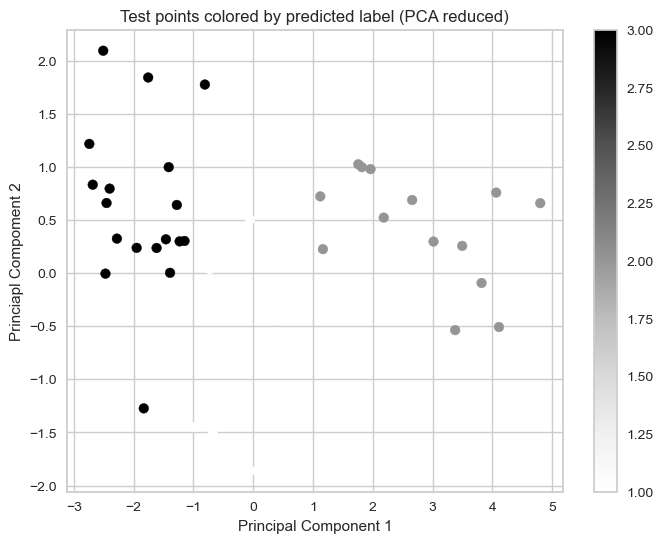

In [133]:
# TODO: Plot test points colored by predicted label
plt.figure(figsize=(8,6))

plt.scatter(pca_result[:,0],pca_result[:,1], c = y_pred)

plt.xlabel('Principal Component 1')
plt.ylabel('Princiapl Compoment 2')
plt.title('Test points colored by predicted label (PCA reduced)')
plt.legend()
plt.colorbar()
plt.show()


#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [134]:
# TODO: Scale feature matrix
scaler.fit(X)
X_scaled = scaler.transform(X)


The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

C:\Users\EricDiep\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\EricDiep\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\EricDiep\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\EricDiep\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is

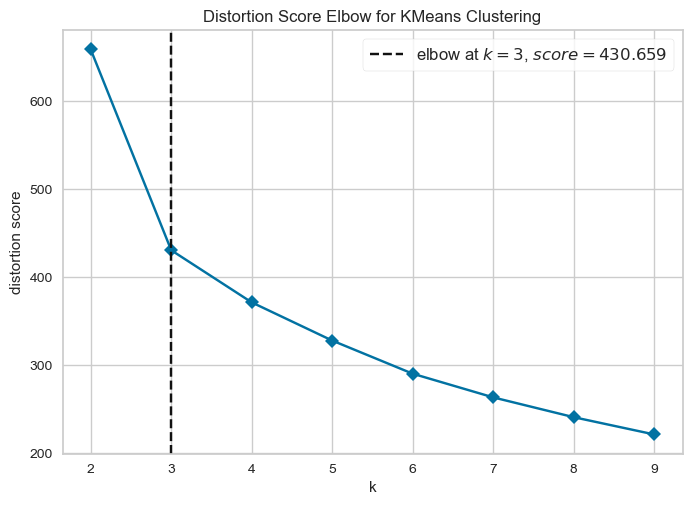

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=54), k=(2, 10),
                 timings=False)

In [135]:
# TODO: Use the elbow method to determine the optimal number of clusters
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=54), X_scaled, k=(2,10), 
                  metric='distortion',
                 timings=False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [136]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=3, random_state=54)
kmeans.fit(X_scaled)

C:\Users\EricDiep\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\EricDiep\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=54)

In [137]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Get Cluster Labels
labels = kmeans.labels_

# Calculate validation metrics
# Silhouette score
silhouette = silhouette_score(X_scaled, labels)
print('Silhouette score: ', silhouette)

# Calinski-Harabasz score
calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
print('Calinski harabasz: ', calinski_harabasz)

# Davies-Bouldin score
davies_bouldin = davies_bouldin_score(X_scaled, labels)
print('Davies Bouldin: ', davies_bouldin )



Silhouette score:  0.40072705527512986
Calinski harabasz:  249.78417491616472
Davies Bouldin:  0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


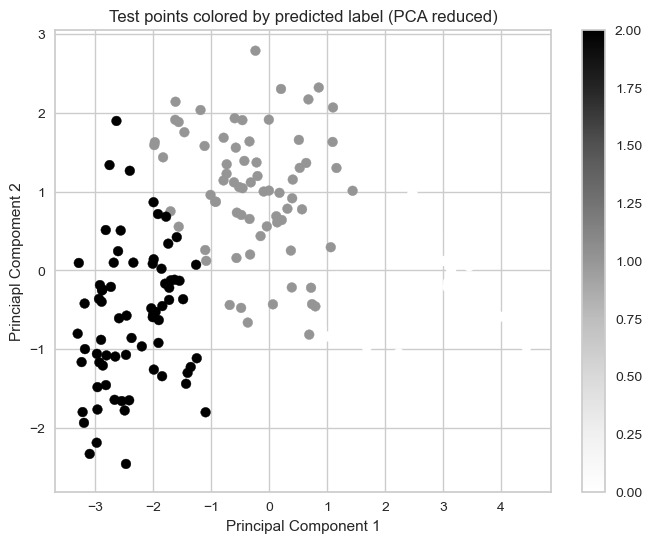

In [138]:
# TODO: Plot clustering results
pca = PCA(n_components = 2) # set the components to 2
# Fit the model to the scaled data
pca_result = pca.fit_transform(X_scaled)


plt.figure(figsize=(8,6))

plt.scatter(pca_result[:,0],pca_result[:,1], c = labels)

plt.xlabel('Principal Component 1')
plt.ylabel('Princiapl Compoment 2')
plt.title('Test points colored by predicted label (PCA reduced)')
plt.legend()
plt.colorbar()
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [139]:
# TODO: Find the number of principal components using explained variance ratio
# Calculate the explained variance ratio
explained_variance_ratio = pca_result.explained_variance_ratio_

# Plot the explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'explained_variance_ratio_'

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [ ]:
# TODO: Use PCA to transform the data

In [ ]:
# TODO: Implement K-means with the transformed data

In [ ]:
# TODO: Calculate the three different validation metrics

### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [ ]:
# TODO: Display results

#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*